In [110]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
sns.set_style('darkgrid')


In [111]:
path= r"C:\Users\Jachimike\Downloads\restaurant_survey_eda_data.csv"
def read_n_clean(path):
    """
    Return pandas dataframe of local csv file
    Params:    
    path: the file path of the csv to load
    
    Returns:
    dataframe object of csv data
    
    """
    #read data and clean
    try:
        df = pd.read_csv(path)
    except:
        print('Path does not exsist')
    #removing whitespace from headers. Noticed whitespace in the column header 'Alcohol'. Initially, 'Alcohol '
    print('Removing whitespace from headers...')
    df=df.rename(columns=lambda x: x.rstrip())
    print('Creating new columns...')
    df['Location']=df['Location'].replace('Central Park,ny','Central Park,NY')
    df['Location']=df['Location'].replace('Market City, MY','Market City, NY')
    df['Age'] = 2025 - df['YOB']
    bins=['Teens','Twenties','Thirties','Fourties','Fifties','Sixties']
    bins_edges=[15,20,30,40,50,60,70]
    df['Age Group']=pd.cut(df['Age'],bins=bins_edges)
    return df

def numerize_dataframe(df):
    """
    Return numerized dataframe
    Params:    
    df: the df to be numerized
    
    Returns:
    numerized dataframe
    
    """
    df_num = df.copy()
    for col in df_num.columns:
        if(df_num[col].dtype == 'category'):
            df_num[col] = df_num[col].cat.codes
        elif(df_num[col].dtype == 'object'):
            df_num[col]= df_num[col].astype('category')
            df_num[col] = df_num[col].cat.codes
    return df_num

def validate_data(df):
    """
    Return shape, info, describe and null count of a dataframe
    Params:    
    df: the df to be validated
    
    Returns:
    dictionary with the info, shape, description and null count
    
    """
    # Extract info about dataset
    df_info={
    "info":df.info(),
    "shape":df.shape,
    "describe":df.describe(),
    "null_count":df.isnull().sum(),
    }
    return df_info

def start(path):
    df=read_n_clean(path)
    df_info=validate_data(df)
    df_num=numerize_dataframe(df)
    return df, df_info, df_num

## LOAD AND CLEAN

In [112]:
df, df_info, df_num= start(path)

Removing whitespace from headers...
Creating new columns...
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   User ID         200 non-null    int64   
 1   Area code       200 non-null    int64   
 2   Location        200 non-null    object  
 3   Gender          200 non-null    object  
 4   YOB             200 non-null    int64   
 5   Marital Status  200 non-null    object  
 6   Activity        200 non-null    object  
 7   Budget          200 non-null    int64   
 8   Cuisines        200 non-null    object  
 9   Alcohol         200 non-null    object  
 10  Smoker          200 non-null    object  
 11  Food Rating     200 non-null    int64   
 12  Service Rating  200 non-null    int64   
 13  Overall Rating  200 non-null    float64 
 14  Often A S       200 non-null    object  
 15  Age             200 non-null    int64   
 16  Ag

In [114]:
df_info.get("null_count")

User ID           0
Area code         0
Location          0
Gender            0
YOB               0
Marital Status    0
Activity          0
Budget            0
Cuisines          0
Alcohol           0
Smoker            0
Food Rating       0
Service Rating    0
Overall Rating    0
Often A S         0
Age               0
Age Group         0
dtype: int64

In [115]:
df_info.get("describe")

,User ID,Area code,YOB,Budget,Food Rating,Service Rating,Overall Rating,Age
count,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,141.060000,1984.830000,3.815000,3.220000,3.230000,3.225000,40.170000
std,57.879185,26.130257,16.809339,1.056578,1.411226,1.526022,1.079445,16.809339
min,1.000000,101.000000,1955.000000,1.000000,1.000000,1.000000,1.000000,16.000000
25%,50.750000,123.000000,1971.000000,3.000000,2.000000,2.000000,2.500000,25.000000
50%,100.500000,135.000000,1987.000000,4.000000,3.000000,3.000000,3.000000,38.000000
75%,150.250000,158.000000,2000.000000,5.000000,5.000000,5.000000,4.000000,54.000000
max,200.000000,199.000000,2009.000000,5.000000,5.000000,5.000000,5.000000,70.000000


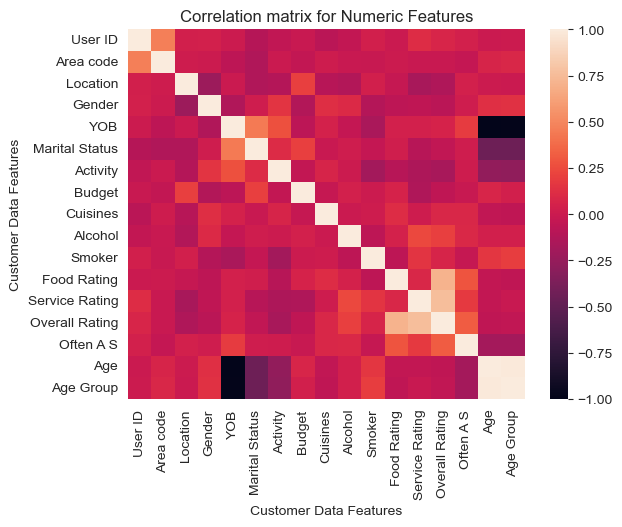

In [116]:
c_matrix = df_num.corr()

sns.heatmap(c_matrix)
plt.title("Correlation matrix for Numeric Features")
plt.xlabel("Customer Data Features")
plt.ylabel("Customer Data Features")
plt.show()

In [117]:
df_all_average_ratings=df[['Overall Rating','Service Rating','Food Rating']].mean()
print(df_all_average_ratings)

Overall Rating    3.225
Service Rating    3.230
Food Rating       3.220
dtype: float64


## Age Analysis

In [118]:
print(f'The minumum customer age is {df['Age'].mean()}')
print(f'The minumum customer age is {df['Age'].min()}')
print(f'The maximum customer age is {df['Age'].max()}')

The minumum customer age is 40.17
The minumum customer age is 16
The maximum customer age is 70


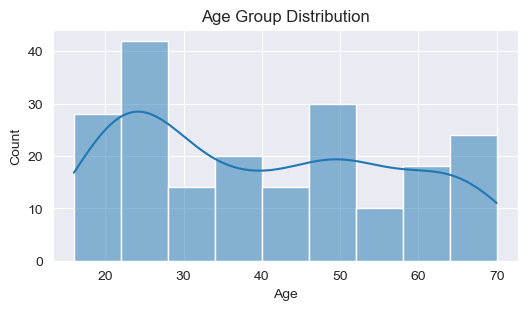

In [119]:
plt.figure(figsize=(6, 3))
sns.histplot(data=df, x='Age', kde=True)
plt.title("Age Group Distribution")
plt.show()

In [156]:
df['Age Group']

0      (15, 20]
1      (30, 40]
2      (40, 50]
3      (60, 70]
4      (20, 30]
         ...   
195    (40, 50]
196    (20, 30]
197    (15, 20]
198    (20, 30]
199    (15, 20]
Name: Age Group, Length: 200, dtype: category
Categories (6, interval[int64, right]): [(15, 20] < (20, 30] < (30, 40] < (40, 50] < (50, 60] < (60, 70]]

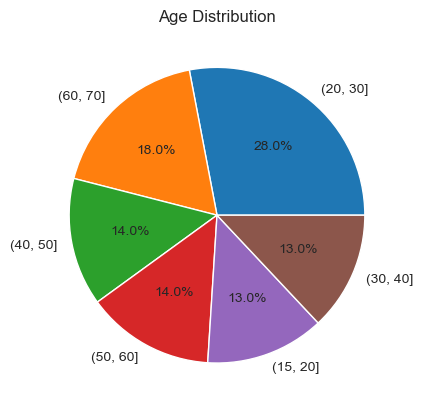

In [120]:
age_counts = df['Age Group'].value_counts()
plt.pie(age_counts, labels=age_counts.index, autopct='%1.1f%%')
plt.title('Age Distribution')
plt.show()

The most numerous age group is the 'Twenties' age group.

In [154]:
df_age_rating_avg=df.groupby('Age Group',observed=True)[['Overall Rating','Service Rating','Food Rating']].agg(['mean'])
df_age_rating_avg

,Overall Rating,Service Rating,Food Rating
,mean,mean,mean
Age Group,,,
"(15, 20]",3.423077,3.115385,3.730769
"(20, 30]",3.250000,3.339286,3.160714
"(30, 40]",2.750000,2.923077,2.576923
"(40, 50]",3.428571,3.392857,3.464286
"(50, 60]",3.642857,3.642857,3.642857
"(60, 70]",2.902778,2.916667,2.888889


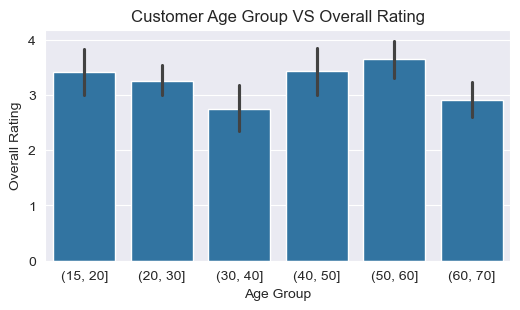

In [122]:
plt.figure(figsize=(6, 3))
sns.barplot(data=df, x='Age Group', y='Overall Rating')
plt.title('Customer Age Group VS Overall Rating')
plt.show()

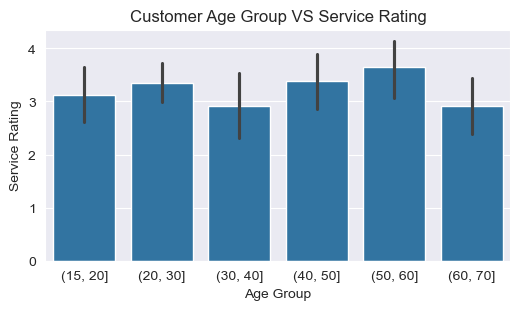

In [123]:
plt.figure(figsize=(6, 3))
sns.barplot(data=df, x='Age Group', y='Service Rating')
plt.title('Customer Age Group VS Service Rating')
plt.show()

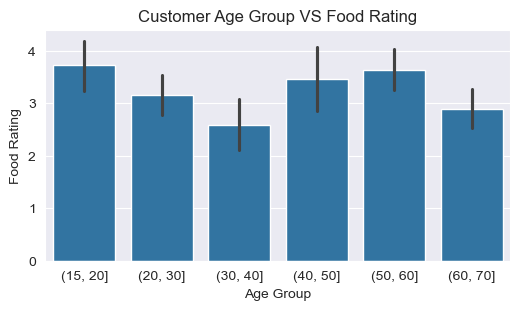

In [124]:
plt.figure(figsize=(6, 3))
sns.barplot(data=df, x='Age Group', y='Food Rating')
plt.title('Customer Age Group VS Food Rating')
plt.show()

## Gender Analysis 

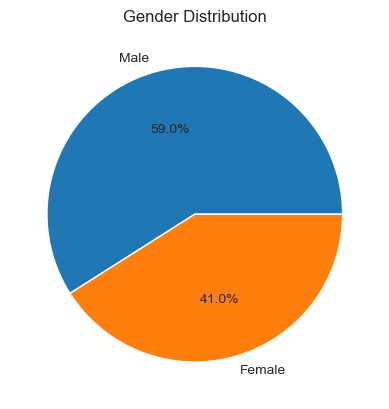

In [125]:
gender_counts = df['Gender'].value_counts()
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%')
plt.title('Gender Distribution')
plt.show()

In [159]:
is_male= df['Gender']=='Male'
is_female= df['Gender']=='Female'
male_sum= is_male.sum()
female_sum= is_female.sum() 
print(f'total male customers: {male_sum}')
print(f'total female customers: {female_sum}')

total male customers: 118
total female customers: 82


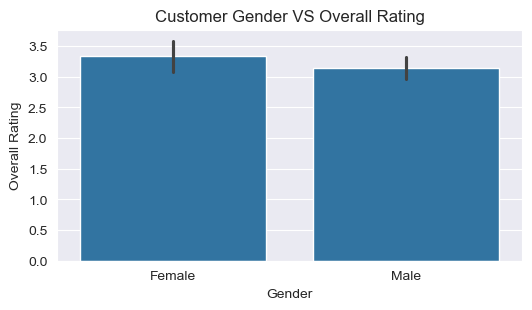

In [127]:
plt.figure(figsize=(6, 3))
sns.barplot(data=df, x='Gender', y='Overall Rating')
plt.title('Customer Gender VS Overall Rating')
plt.show()

In [128]:
df_gender_rating_avg=df.groupby('Gender',observed=True)[['Overall Rating','Service Rating','Food Rating']].agg(['mean'])
df_gender_rating_avg

,Overall Rating,Service Rating,Food Rating
,mean,mean,mean
Gender,,,
Female,3.335366,3.341463,3.329268
Male,3.148305,3.152542,3.144068


## Customer Habits Analysis

In [129]:
print(df['Alcohol'].unique())
print(df['Smoker'].unique())

['Never' 'Often' 'Socially']
['Never' 'Socially' 'Often']


In [130]:
df_smoker_rating_avg=df.groupby('Smoker',observed=True)[['Overall Rating','Service Rating','Food Rating']].agg(['mean'])
df_smoker_rating_avg

,Overall Rating,Service Rating,Food Rating
,mean,mean,mean
Smoker,,,
Never,2.737288,2.644068,2.830508
Often,3.885714,3.671429,4.100000
Socially,2.978873,3.281690,2.676056


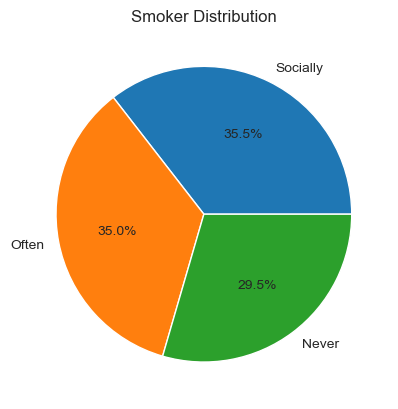

In [131]:
smoker_counts = df['Smoker'].value_counts()
plt.pie(smoker_counts, labels=smoker_counts.index, autopct='%1.01f%%')
plt.title('Smoker Distribution')
plt.show()

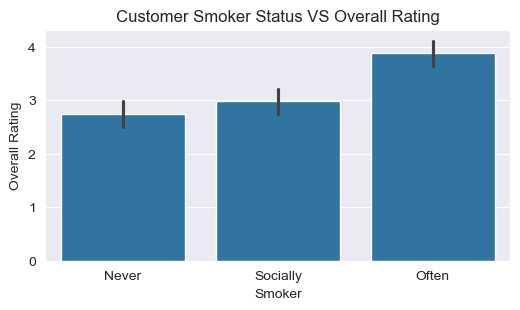

In [132]:
plt.figure(figsize=(6, 3))
sns.barplot(data=df, x='Smoker', y='Overall Rating')
plt.title('Customer Smoker Status VS Overall Rating')
plt.show()

This suggests that people who smoke often, give higer ratings on average than social smokers or non-smokers.

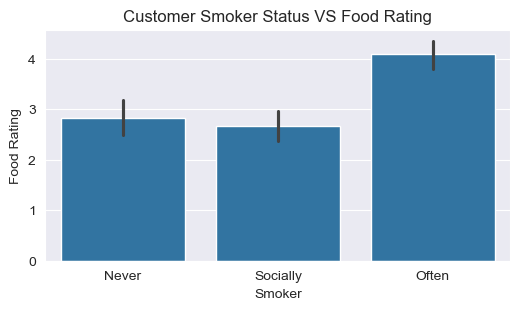

In [133]:
plt.figure(figsize=(6, 3))
sns.barplot(data=df, x='Smoker', y='Food Rating')
plt.title('Customer Smoker Status VS Food Rating')
plt.show()

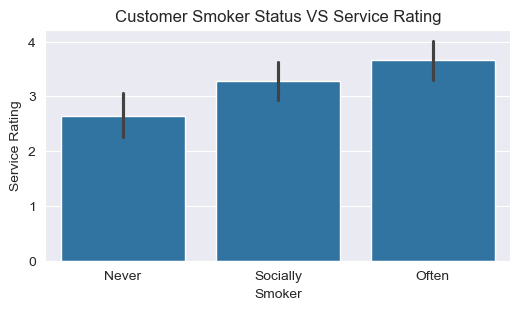

In [134]:
plt.figure(figsize=(6, 3))
sns.barplot(data=df, x='Smoker', y='Service Rating')
plt.title('Customer Smoker Status VS Service Rating')
plt.show()

In [135]:
df_alcohol_rating_avg=df.groupby('Alcohol',observed=True)[['Overall Rating','Service Rating','Food Rating']].agg(['mean'])
df_alcohol_rating_avg

,Overall Rating,Service Rating,Food Rating
,mean,mean,mean
Alcohol,,,
Never,2.965909,2.840909,3.090909
Often,3.393443,3.377049,3.409836
Socially,3.470588,3.725490,3.215686


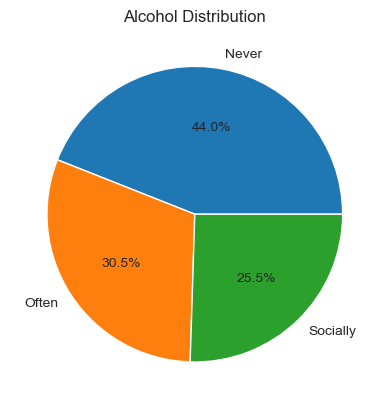

In [136]:
alcohol_counts = df['Alcohol'].value_counts()
plt.pie(alcohol_counts, labels=alcohol_counts.index, autopct='%1.01f%%')
plt.title('Alcohol Distribution')
plt.show()

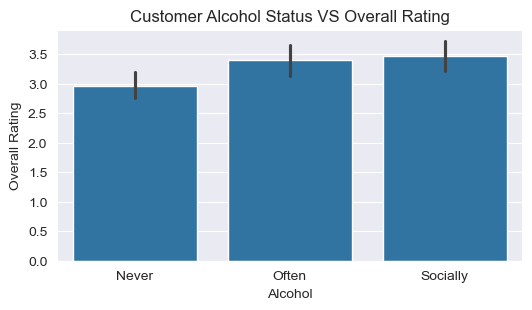

In [137]:
plt.figure(figsize=(6, 3))
sns.barplot(data=df, x='Alcohol', y='Overall Rating')
plt.title('Customer Alcohol Status VS Overall Rating')
plt.show()

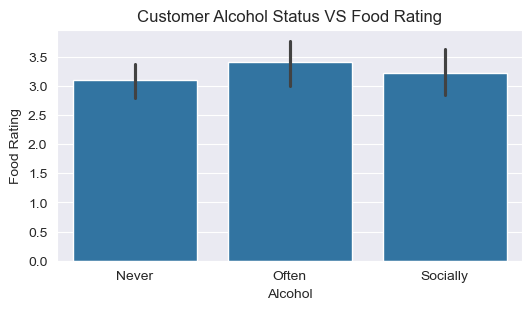

In [138]:
plt.figure(figsize=(6, 3))
sns.barplot(data=df, x='Alcohol', y='Food Rating')
plt.title('Customer Alcohol Status VS Food Rating')
plt.show()

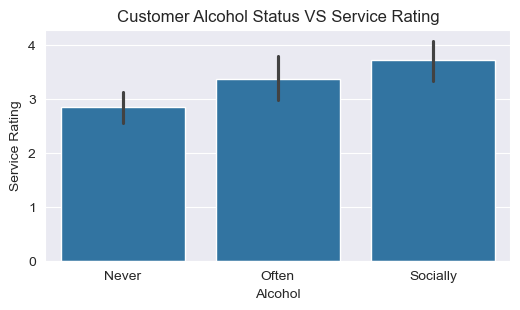

In [139]:
plt.figure(figsize=(6, 3))
sns.barplot(data=df, x='Alcohol', y='Service Rating')
plt.title('Customer Alcohol Status VS Service Rating')
plt.show()

## Cuisine Analysis

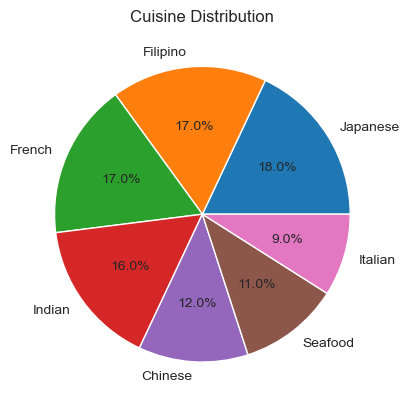

In [140]:
# autopct controls the format of the percentages on the pie chart. first
cuisine_counts = df['Cuisines'].value_counts()
plt.pie(cuisine_counts, labels=cuisine_counts.index, autopct='%1.01f%%')
plt.title('Cuisine Distribution')
plt.show()

Japanese cuisine is the most popular among restaurant customers. Italian seems unpopular among customers

In [141]:
df.loc[df['Cuisines']=='Japanese','Budget'].mean()

4.111111111111111

In [142]:
df.loc[df['Cuisines']=='Italian','Budget'].mean()

3.888888888888889

## Budget

In [143]:
df.groupby('Marital Status')['Budget'].agg('mean')

Marital Status
Divorced    2.571429
Married     3.918605
Single      3.900000
Name: Budget, dtype: float64

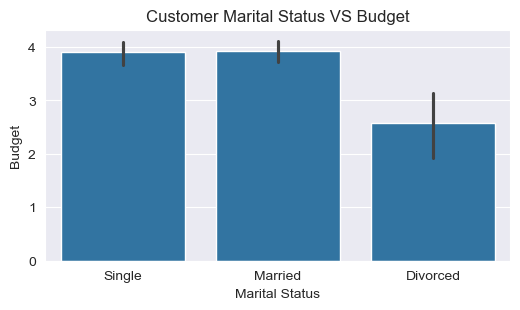

In [144]:
plt.figure(figsize=(6, 3))
sns.barplot(data=df, x='Marital Status', y='Budget')
plt.title('Customer Marital Status VS Budget')
plt.show()

In [145]:
df.groupby('Age Group',observed=False)['Budget'].agg('mean')

Age Group
(15, 20]    4.153846
(20, 30]    3.392857
(30, 40]    4.192308
(40, 50]    4.142857
(50, 60]    3.428571
(60, 70]    4.000000
Name: Budget, dtype: float64

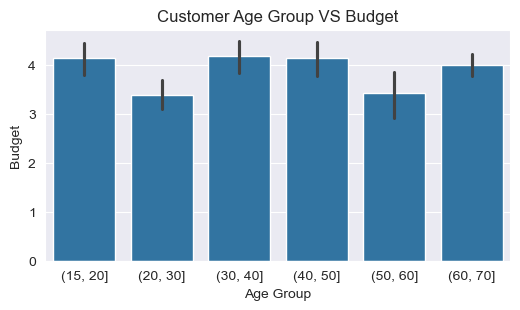

In [146]:
plt.figure(figsize=(6, 3))
sns.barplot(data=df, x='Age Group', y='Budget')
plt.title('Customer Age Group VS Budget')
plt.show()

In [147]:
df.groupby('Smoker')['Budget'].agg('mean')

Smoker
Never       3.932203
Often       3.600000
Socially    3.929577
Name: Budget, dtype: float64

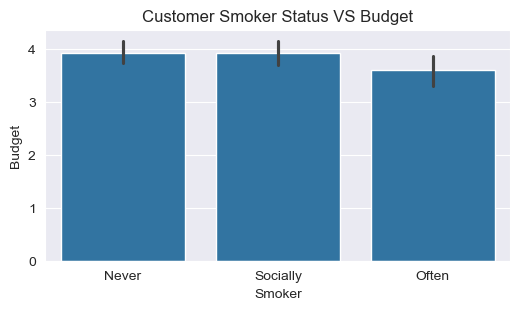

In [148]:
plt.figure(figsize=(6, 3))
sns.barplot(data=df, x='Smoker', y='Budget')
plt.title('Customer Smoker Status VS Budget')
plt.show()

In [149]:
df.groupby('Alcohol')['Budget'].agg('mean')

Alcohol
Never       3.840909
Often       3.622951
Socially    4.000000
Name: Budget, dtype: float64

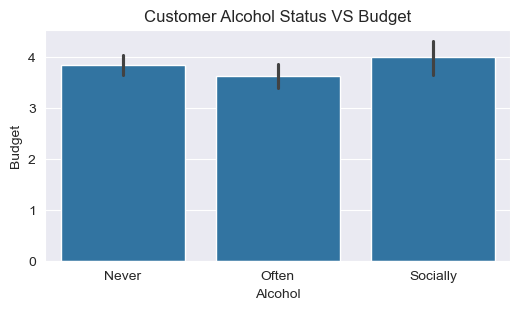

In [150]:
plt.figure(figsize=(6, 3))
sns.barplot(data=df, x='Alcohol', y='Budget')
plt.title('Customer Alcohol Status VS Budget')
plt.show()

In [151]:
df.groupby(['Alcohol','Age Group'],observed=True)['Budget'].agg('mean')

Alcohol   Age Group
Never     (15, 20]     4.000000
          (20, 30]     3.687500
          (30, 40]     4.312500
          (40, 50]     3.833333
          (50, 60]     3.333333
          (60, 70]     4.000000
Often     (15, 20]     4.000000
          (20, 30]     3.111111
          (30, 40]     3.750000
          (40, 50]     4.333333
          (50, 60]     3.500000
          (60, 70]     3.600000
Socially  (15, 20]     4.333333
          (20, 30]     2.666667
          (30, 40]     5.000000
          (40, 50]     4.153846
          (50, 60]     3.500000
          (60, 70]     4.400000
Name: Budget, dtype: float64

In [152]:
df.groupby(['Smoker','Age Group'],observed=True)['Budget'].agg('mean')

Smoker    Age Group
Never     (15, 20]     4.272727
          (20, 30]     3.666667
          (30, 40]     4.545455
          (40, 50]     4.250000
          (50, 60]     3.000000
          (60, 70]     3.400000
Often     (15, 20]     4.200000
          (20, 30]     3.320000
          (30, 40]     4.000000
          (40, 50]     4.000000
          (50, 60]     3.000000
          (60, 70]     4.500000
Socially  (15, 20]     3.800000
          (20, 30]     3.250000
          (30, 40]     3.909091
          (40, 50]     4.250000
          (50, 60]     4.333333
          (60, 70]     4.181818
Name: Budget, dtype: float64